# Clustering Crypto

In [81]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
from sklearn.cluster import AgglomerativeClustering
import holoviews as hv

### Deliverable 1: Preprocessing the Data for PCA

In [2]:
# Load the crypto_data.csv dataset.
file_link = "Resources/crypto_data.csv"
crypto_df = pd.read_csv(file_link)
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df = crypto_df.set_index("Unnamed: 0")
crypto_df.index.name = None
crypto_df


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(["IsTrading"], axis=1)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names_df = pd.DataFrame(crypto_df["CoinName"])
crypto_names_df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [9]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(["CoinName"], axis=1)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(X)
print(crypto_scaled)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


### Deliverable 2: Reducing Data Dimensions Using PCA

In [12]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-0.32788337,  1.09860882, -0.55657511],
       [-0.31122199,  1.09897051, -0.557006  ],
       [ 2.2952511 ,  1.74157864, -0.74659482],
       ...,
       [ 0.32317175, -2.23518527,  0.46438786],
       [-0.17792338, -1.65521733,  0.33515648],
       [-0.28057112,  0.76698801, -0.23592151]])

In [13]:
# Create a DataFrame with the three principal components.
pca_df = pd.DataFrame(
    data=crypto_pca, columns=["PC 1", "PC 2", "PC 3"], index=crypto_df.index)
pca_df

,PC 1,PC 2,PC 3
42,-0.327883,1.098609,-0.556575
404,-0.311222,1.098971,-0.557006
1337,2.295251,1.741579,-0.746595
BTC,-0.154301,-1.305640,0.114485
ETH,-0.152750,-2.040668,0.411272
...,...,...,...
ZEPH,2.462456,0.530018,-0.111493
GAP,-0.325929,1.098531,-0.556601
BDX,0.323172,-2.235185,0.464388
ZEN,-0.177923,-1.655217,0.335156


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [14]:
# Create an elbow curve to find the best value for K.
# Find the best value for K
inertia = []
k = list(range(1,11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)
    
#Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")



:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [33]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)
model.labels_

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [35]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pca_df], axis=1)
clustered_df
clustered_df.index.name = None
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = pd.Series(crypto_names_df["CoinName"])

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.327883,1.098609,-0.556575,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.311222,1.098971,-0.557006,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.295251,1.741579,-0.746595,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.154301,-1.305640,0.114485,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.152750,-2.040668,0.411272,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.156285,-1.038233,0.034344,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.403960,1.211814,-0.515134,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.144083,-2.276814,0.455267,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.151192,-2.040736,0.411252,Ethereum Classic,1
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.177922,-1.655217,0.335156,ZCash,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

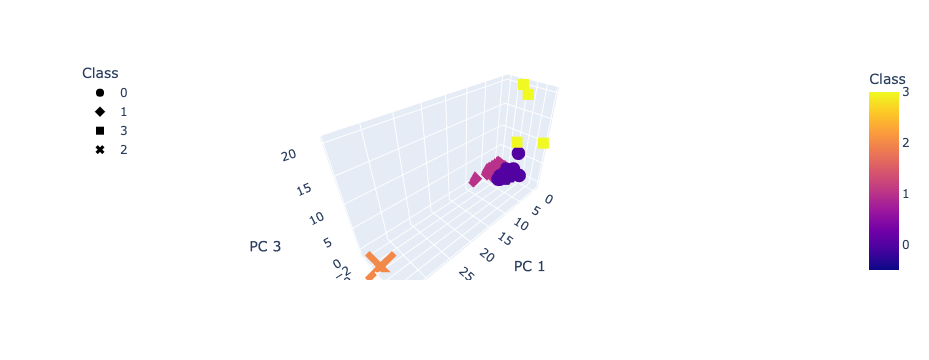

In [59]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(clustered_df, x="PC 1", y="PC 2", z="PC 3",
                    color="Class", symbol="Class", hover_name='CoinName', hover_data=["Algorithm"], width=1200)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [37]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"],
                         sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [38]:
# Print the total number of tradable cryptocurrencies.
clustered_df["CoinName"].count()

532

In [39]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
cluster_scaled = MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply", "TotalCoinsMined"]])
cluster_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [40]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(cluster_scaled, columns=("TotalCoinSupply", "TotalCoinsMined"), index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName"] = pd.Series(clustered_df["CoinName"])

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"] = pd.Series(clustered_df["Class"])

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,1
ETH,0.000000e+00,0.000109,Ethereum,1
LTC,8.400000e-05,0.000064,Litecoin,1
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,1
ETC,2.100000e-04,0.000115,Ethereum Classic,1
ZEC,2.100000e-05,0.000007,ZCash,1


In [98]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class", line_color='k', color=hv.Cycle('Colorblind'), size=75)


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)

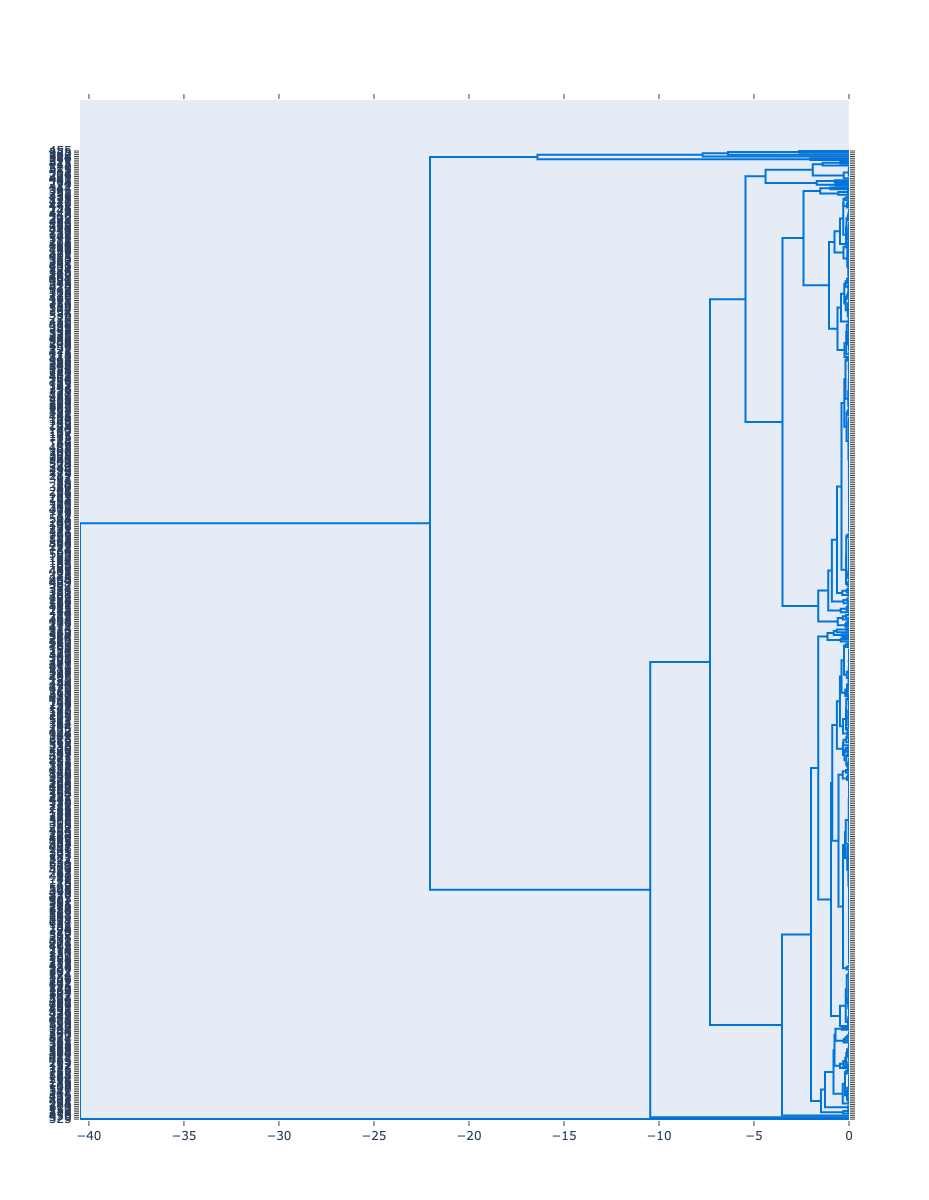

In [60]:
# Create a dendrogram
fig = ff.create_dendrogram(pca_df, color_threshold=0, orientation='right', labels=None)
fig.update_layout(width=800, height=1200)
fig.show()

In [68]:
agg = AgglomerativeClustering(n_clusters=4)
model = agg.fit(pca_df)

In [75]:
pca_df["class"] = model.labels_
pca_df.info

<bound method DataFrame.info of           PC 1      PC 2      PC 3  class
42   -0.327883  1.098609 -0.556575      1
404  -0.311222  1.098971 -0.557006      1
1337  2.295251  1.741579 -0.746595      0
BTC  -0.154301 -1.305640  0.114485      0
ETH  -0.152750 -2.040668  0.411272      0
...        ...       ...       ...    ...
ZEPH  2.462456  0.530018 -0.111493      0
GAP  -0.325929  1.098531 -0.556601      1
BDX   0.323172 -2.235185  0.464388      0
ZEN  -0.177923 -1.655217  0.335156      0
XBC  -0.280571  0.766988 -0.235922      1

[532 rows x 4 columns]>

In [73]:
pca_df.hvplot.scatter(
    x="PC 1",
    y="PC 2",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [PC 1]   (PC 2,class)

In [71]:
pca_df.hvplot.scatter(
    x="PC 1",
    y="PC 3",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [PC 1]   (PC 3,class)

In [72]:
pca_df.hvplot.scatter(
    x="PC 2",
    y="PC 3",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [PC 2]   (PC 3,class)